In [555]:
import pandas as pd
import numpy as np
import datetime
from utils import *
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
# import numpy as np
%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
utils are imported! yeah!


## Read Data

In [486]:
census_file = "../Data/2019-09-13Census and Surgical Admits and Scheduled 2.csv"

df_census = pd.read_csv(census_file, index_col = 0)
df_census = convert_datatimes(df_census)

/Users/Teng/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [487]:
# convert the service and dept names
df_census_converted = convert_service_name(df_census)
df_census_converted = convert_dept_name(df_census_converted)

In [488]:
# filter out the data by time
start_date = datetime.datetime(year = 2018, month = 9, day = 1)
end_date = datetime.datetime(year = 2019, month = 9, day = 1)
df_census_2019 = df_census_converted.loc[(df_census_converted['Effective Date/Time'] >= start_date) &
                                        (df_census_converted['Effective Date/Time'] < end_date)]

In [489]:
# add some columns
df_census_2019.loc[:,'Date']  = df_census_2019['Effective Date/Time'].dt.date

/Users/Teng/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/Teng/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


## Unit-service explore

In [490]:
# print the major services in each unit
print_services_in_units(df_census_2019)

Major Services in [ NICU270 ] :::::::
General Pediatrics    9449
Cardiology              63
Unknown                 28
General Surgery         13
Neurosurgery            10
ENT                      6
Green Team               1
Orthopedics              1
Pulmonary                1
Urology                  1
Name: Service.x, dtype: int64


Major Services in [ NN ] :::::::
General Pediatrics    9295
Unknown                  5
General Surgery          1
Name: Service.x, dtype: int64


Major Services in [ PCU160 ] :::::::
HemeOnc/SCT                 5316
HemeOnc and StemCell        3403
Unknown                       47
General Pediatrics            33
General Surgery               17
Interventional Radiology       5
Neurology                      5
Orthopedics                    5
Green Team                     4
ENT                            4
Name: Service.x, dtype: int64


Major Services in [ PCU300 ] :::::::
Green Team            2019
Red Team              1534
General Pediatrics    12

Note: it seems that PCU380 is (re?)opened since mid Jun, 2019. Thus we might want to consider the data up to 
May 2019

In [27]:
# end_date = datetime.datetime(year = 2019, month = 5, day =31)
# df_census_2019_to_may = df_census_2019.loc[df_census_2019['Effective Date/Time']<=end_date]

## Filter out specific units and services

In [491]:
# Units to consider
units_to_consider = ['PCU160', 'PCU200', 'PCU300', 'PCU360', 'PCU400']
df_to_work = df_census_2019.loc[df_census_2019['Dept Abbrev'].isin(units_to_consider)]

In [492]:
df_to_work['Service.x'].value_counts()

HemeOnc/SCT                  6485
Cardiology                   5551
General Pediatrics           5320
HemeOnc and StemCell         3457
Pulmonary                    2565
Green Team                   2338
General Surgery              2092
Red Team                     1767
Neurosurgery                 1288
Orthopedics                  1038
Neurology                     635
ENT                           583
Liver Transplant              436
Unknown                       427
Urology                       296
Plastic Surgery               270
Transplant                    205
Pain                          192
Interventional Radiology       79
Anesthesia                     36
Kidney Transplant              24
Cardiovascular Transplant      18
Gynecology                     17
Immunology & Allergy            1
Name: Service.x, dtype: int64

In [493]:
service_thresh = 10
temp = df_to_work['Service.x'].value_counts().reset_index()
services_to_consider = temp.loc[temp['Service.x'] >= service_thresh]['index'].to_list()
print('consider', len(services_to_consider), 'services!!')
df_to_work = df_to_work.loc[df_to_work['Service.x'].isin(services_to_consider)]

consider 23 services!!


In [494]:
services_to_consider

['HemeOnc/SCT',
 'Cardiology',
 'General Pediatrics',
 'HemeOnc and StemCell',
 'Pulmonary',
 'Green Team',
 'General Surgery',
 'Red Team',
 'Neurosurgery',
 'Orthopedics',
 'Neurology',
 'ENT',
 'Liver Transplant',
 'Unknown',
 'Urology',
 'Plastic Surgery',
 'Transplant',
 'Pain',
 'Interventional Radiology',
 'Anesthesia',
 'Kidney Transplant',
 'Cardiovascular Transplant',
 'Gynecology']

In [495]:
print_services_in_units(df_to_work)

Major Services in [ PCU160 ] :::::::
HemeOnc/SCT                 5316
HemeOnc and StemCell        3403
Unknown                       47
General Pediatrics            33
General Surgery               17
Interventional Radiology       5
Neurology                      5
Orthopedics                    5
Green Team                     4
ENT                            4
Name: Service.x, dtype: int64


Major Services in [ PCU300 ] :::::::
Green Team            2019
Red Team              1534
General Pediatrics    1297
General Surgery       1033
Liver Transplant       436
ENT                    309
Urology                279
Unknown                237
Pulmonary              232
Transplant             203
Name: Service.x, dtype: int64


Major Services in [ PCU200 ] :::::::
Cardiology            5538
General Pediatrics     953
General Surgery        371
HemeOnc/SCT            216
Pulmonary              182
ENT                    136
Red Team               126
Green Team              74
Unknown  

In [496]:
print_units_of_services(df_to_work)

Major Units of Service [ HemeOnc/SCT ] :::::::
PCU160    5316
PCU360     929
PCU200     216
PCU400      15
PCU300       9
Name: Dept Abbrev, dtype: int64


Major Units of Service [ Cardiology ] :::::::
PCU200    5538
PCU300      12
PCU400       1
Name: Dept Abbrev, dtype: int64


Major Units of Service [ General Pediatrics ] :::::::
PCU400    2348
PCU300    1297
PCU200     953
PCU360     689
PCU160      33
Name: Dept Abbrev, dtype: int64


Major Units of Service [ HemeOnc and StemCell ] :::::::
PCU160    3403
PCU200      22
PCU360      16
PCU300      16
Name: Dept Abbrev, dtype: int64


Major Units of Service [ Pulmonary ] :::::::
PCU400    2107
PCU300     232
PCU200     182
PCU360      43
PCU160       1
Name: Dept Abbrev, dtype: int64


Major Units of Service [ Green Team ] :::::::
PCU300    2019
PCU360     131
PCU400     110
PCU200      74
PCU160       4
Name: Dept Abbrev, dtype: int64


Major Units of Service [ General Surgery ] :::::::
PCU300    1033
PCU360     481
PCU200     371
P

## Rename 160 to 500:
from now on, we are switching 160 to 500

In [497]:
def switch_160_to_500(d):
    if d == 'PCU160':
        return 'PCU500'
    else:
        return d
df_to_work['Dept Abbrev'] = df_to_work['Dept Abbrev'].apply(switch_160_to_500)

In [498]:
units_to_consider = ['PCU200', 'PCU300', 'PCU360', 'PCU400', 'PCU500']

## Unit capacity

In [499]:
unit_daily_cap = df_to_work.groupby(['Dept Abbrev', 'Date']).size().reset_index()
unit_daily_cap = unit_daily_cap.rename(columns = {0:'Occupacy'})
unit_cap = unit_daily_cap.groupby('Dept Abbrev')['Occupacy'].max().reset_index()

In [500]:
unit_cap

,Dept Abbrev,Occupacy
0,PCU200,26
1,PCU300,26
2,PCU360,14
3,PCU400,25
4,PCU500,27


In [501]:
# fix from slides
unit_cap.loc[3, 'Occupacy'] = 24
unit_cap.loc[4, 'Occupacy'] = 49

In [502]:
unit_cap

,Dept Abbrev,Occupacy
0,PCU200,26
1,PCU300,26
2,PCU360,14
3,PCU400,24
4,PCU500,49


In [503]:
unit_cap_dict = {unit_cap.loc[i, 'Dept Abbrev']: unit_cap.loc[i, 'Occupacy'] for i in range(len(units_to_consider))}

In [504]:
unit_cap_dict

{'PCU200': 26, 'PCU300': 26, 'PCU360': 14, 'PCU400': 24, 'PCU500': 49}

In [519]:
df_census_2019.loc[df_census_2019['Dept Abbrev'] == 'PCU380']['Effective Date/Time'].min()

Timestamp('2019-06-18 23:59:00')

## Daily service counts

In [523]:
temp = df_service_range.groupby('Date').size().reset_index().rename(columns = {0:'Total Census'})
temp.loc[temp['Date']>=datetime.date(year = 2019, month =2, day = 1 )]

,Date,Total Census
153,2019-02-01,105
154,2019-02-02,99
155,2019-02-03,97
156,2019-02-04,99
157,2019-02-05,108
158,2019-02-06,107
159,2019-02-07,107
160,2019-02-08,113
161,2019-02-09,101
162,2019-02-10,101


In [524]:
temp = df_service_range.groupby(['Date', 'Dept Abbrev']).size().reset_index().rename(columns = {0:'Total Census'})
temp.loc[temp['Date']>=datetime.date(year = 2019, month =2, day = 1 )]

,Date,Dept Abbrev,Total Census
679,2019-02-01,PCU160,24
680,2019-02-01,PCU200,26
681,2019-02-01,PCU300,23
682,2019-02-01,PCU360,11
683,2019-02-01,PCU400,21
684,2019-02-02,PCU160,23
685,2019-02-02,PCU200,23
686,2019-02-02,PCU300,24
687,2019-02-02,PCU360,8
688,2019-02-02,PCU400,21


In [505]:
df_census_2019['Dept Abbrev'].value_counts()

NICU270     9574
NN          9301
PCU160      8847
PCU300      8125
PCU200      7770
PCU400      7709
CVICU220    7389
MAT292      6301
MAT192      5641
ICN1        4994
PICU420     4873
LDR         3771
PICU320     3441
CCP         3102
PCU360      2669
ICN2        2151
MAT350      1325
NICU260     1269
SEQN        1228
SSU         1009
PEC          951
CVICU320     757
PCU380       425
PAC          294
APU           64
BCDHPAC       41
INFUS         26
Name: Dept Abbrev, dtype: int64

In [556]:
# service_count_daily = pd.DataFrame()
acute_units = ['PCU160', 'PCU200', 'PCU300', 'PCU360',
              'PCU380', 'PCU400']
df_service_range = df_census_2019.loc[df_census_2019['Dept Abbrev'].isin(acute_units)]
# df_service_range = df_to_work.copy()


service = services_to_consider[0]
temp = df_service_range.loc[df_service_range['Service.x'] == service]
temp = temp.groupby('Date')['Service.x'].size().reset_index()
service_count_daily = temp.rename(columns = {'Service.x':service})

for service in services_to_consider[1:]:
    temp = df_service_range.loc[df_service_range['Service.x'] == service]
    temp = temp.groupby('Date')['Service.x'].size().reset_index()
    service_count_daily = service_count_daily.merge(temp.rename(columns = {'Service.x':service}), 
                                                    on = 'Date', how = 'left')
service_count_daily = service_count_daily.fillna(0)

# sanity check: if we missed some days
days_range = (service_count_daily['Date'].max() - service_count_daily['Date'].min()) / datetime.timedelta(days = 1)
assert (days_range+1 == service_count_daily.shape[0]), "Range not match!"

In [557]:
# daily stats for each service
temp = service_daily_stats(service_count_daily, services_to_consider)
temp.transpose().sort_values('50%', ascending = False)
# for service in temp.columns:
#     print(temp[service])

,count,mean,std,min,25%,50%,75%,95%,97%,max
HemeOnc/SCT,365.0,17.775342,3.671085,8.0,15.0,18.0,20.0,23.8,25.0,31.0
Cardiology,365.0,15.208219,3.312553,4.0,13.0,15.0,18.0,20.0,21.0,23.0
General Pediatrics,365.0,14.860274,3.557176,4.0,13.0,15.0,17.0,21.0,22.0,25.0
HemeOnc and StemCell,365.0,9.471233,2.042776,5.0,8.0,9.0,11.0,13.0,13.0,15.0
Pulmonary,365.0,7.115068,2.545826,2.0,6.0,7.0,8.0,12.0,13.0,16.0
Green Team,365.0,6.624658,2.463792,1.0,5.0,6.0,8.0,11.0,12.0,15.0
General Surgery,365.0,5.980822,2.781842,0.0,4.0,6.0,8.0,11.0,12.0,15.0
Red Team,365.0,4.942466,2.202516,0.0,3.0,5.0,7.0,8.0,9.0,11.0
Neurosurgery,365.0,3.528767,2.106340,0.0,2.0,3.0,5.0,8.0,8.0,10.0
Orthopedics,365.0,2.873973,1.774516,0.0,2.0,3.0,4.0,6.0,7.0,9.0


According to the slide, there is a growth factor for each service

In [558]:
service_count_daily = daily_census_adjust(service_count_daily)

In [559]:
# create a dictionary for optimazation
service_count_daily_dicts = [{service:row[service] for service in services_to_consider } 
                             for index, row in service_count_daily.iterrows()]

## IP to solve the optimal allocation

In [325]:
from qpmodel import *
%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [256]:
# look at what we are solving
units_to_consider
services_to_consider

['HemeOnc/SCT',
 'Cardiology',
 'General Pediatrics',
 'HemeOnc and StemCell',
 'Pulmonary',
 'Green Team',
 'General Surgery',
 'Red Team',
 'Neurosurgery',
 'Orthopedics',
 'Neurology',
 'ENT',
 'Liver Transplant',
 'Intensive Care',
 'Urology',
 'Plastic Surgery',
 'Transplant',
 'Pain',
 'Interventional Radiology',
 'Anesthesia',
 'Unknown',
 'Cardiovascular Transplant',
 'Kidney Transplant',
 'Gynecology']

In [326]:
allocation = constrained_piecewise(services_to_consider, units_to_consider, service_count_daily_dicts,
                    unit_cap_dict, cap_thresh = 0.95)
# allocation = constrained_qp(services_to_consider, units_to_consider, service_count_daily_dicts,
#                     unit_cap_dict, cap_thresh = 0.90)

Optimize a model with 1922 rows, 2005 columns and 30543 nonzeros
Model has 1885 piecewise-linear objective terms
Variable types: 1885 continuous, 120 integer (120 binary)
Coefficient statistics:
  Matrix range     [5e-01, 3e+01]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Found heuristic solution: objective 1885.0000000
Presolve removed 91 rows and 127 columns
Presolve time: 0.05s
Presolved: 7288 rows, 9154 columns, 25603 nonzeros
Presolved model has 1819 SOS constraint(s)
Found heuristic solution: objective 1868.0000000
Variable types: 5457 continuous, 3697 integer (3697 binary)

Root relaxation: objective 9.585000e+02, 2971 iterations, 0.03 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  958.50000    0  347 1868.00000  958.50000  48.7%     -    0s
H    0     0                    1130.5000000  958.50000 

In [360]:
# print the allocation
temp = allocation_to_dict(allocation, units_to_consider, services_to_consider)
for unit in temp:
    print(unit, temp[unit])

PCU200 ['Cardiology', 'ENT', 'Plastic Surgery', 'Cardiovascular Transplant']
PCU300 ['Green Team', 'Red Team', 'Liver Transplant', 'Unknown', 'Transplant', 'Pain', 'Kidney Transplant']
PCU360 ['General Surgery', 'Orthopedics', 'Interventional Radiology']
PCU400 ['Pulmonary', 'Neurosurgery', 'Neurology', 'Urology', 'Anesthesia', 'Gynecology']
PCU500 ['HemeOnc/SCT', 'General Pediatrics', 'HemeOnc and StemCell']


## Calulate the performance

In [377]:
all_df

,PCU200,PCU300,PCU360,PCU400,PCU500
Service,,,,,
Cardiology,1,0,0,0,0
ENT,1,0,0,0,0
Plastic Surgery,1,0,0,0,0
Cardiovascular Transplant,1,0,0,0,0
Green Team,0,1,0,0,0
Red Team,0,1,0,0,0
Liver Transplant,0,1,0,0,0
Unknown,0,1,0,0,0
Transplant,0,1,0,0,0


In [328]:
from perform_utils import *

In [329]:
result = cal_daily_census(allocation, service_count_daily, units_to_consider, services_to_consider)

----off-service-stats----
PCU200 [0, 1]
PCU300 [166, 233]
PCU360 [278, 329]
PCU400 [11, 38]
PCU500 [0, 2]
----in-total----
455 603


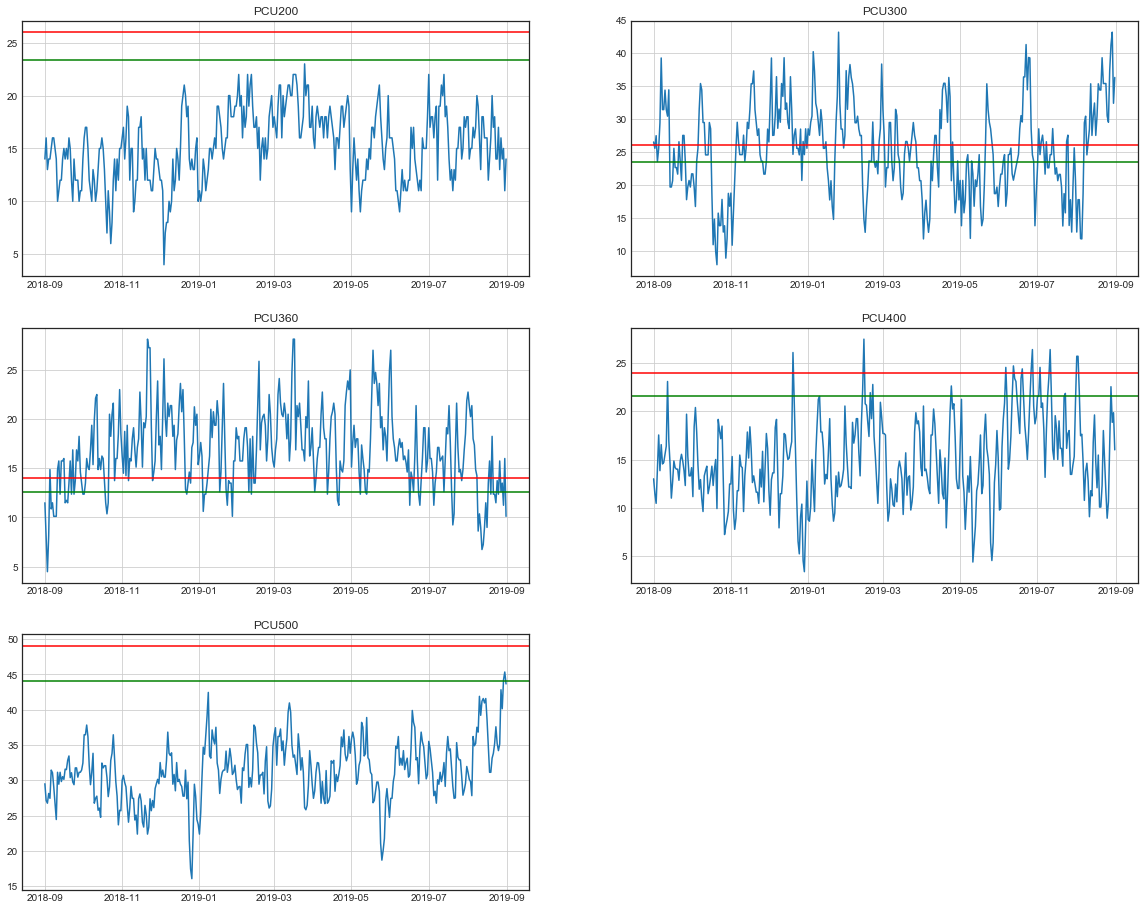

In [527]:
# plot the performance for each unit

f = plt.figure(figsize=(20,16))
off_unit_days = {}
for i in range(len(units_to_consider)):
    unit = units_to_consider[i]
    ax = f.add_subplot(3, 2, i+1)
    ax.plot(result[unit])
    ax.axhline(y=unit_cap_dict[unit], color='r', linestyle='-')
    ax.axhline(y=unit_cap_dict[unit]*0.9, color='g', linestyle='-')
    off_unit_days[unit] = cal_off_cap(result, unit, unit_cap_dict)
    ax.title.set_text(unit)
    ax.grid()
    
print('----off-service-stats----')
over_cap_count = 0
over_90_count = 0
for key in off_unit_days:
    aa, bb = off_unit_days[key]
    over_cap_count += aa
    over_90_count += bb
    print(key, off_unit_days[key])
print('----in-total----')
print(over_cap_count, over_90_count)

## Compare the current data with the slides

In [380]:
temp

{'PCU200': ['Cardiology',
  'ENT',
  'Plastic Surgery',
  'Cardiovascular Transplant'],
 'PCU300': ['Green Team',
  'Red Team',
  'Liver Transplant',
  'Unknown',
  'Transplant',
  'Pain',
  'Kidney Transplant'],
 'PCU360': ['General Surgery', 'Orthopedics', 'Interventional Radiology'],
 'PCU400': ['Pulmonary',
  'Neurosurgery',
  'Neurology',
  'Urology',
  'Anesthesia',
  'Gynecology'],
 'PCU500': ['HemeOnc/SCT', 'General Pediatrics', 'HemeOnc and StemCell']}

----off-service-stats----
[over_full_cap_days, over_90%_cap_days]
PCU200 [0, 1]
PCU300 [65, 128]
PCU360 [280, 332]
PCU400 [21, 71]
PCU500 [0, 4]
----in-total----
366 536


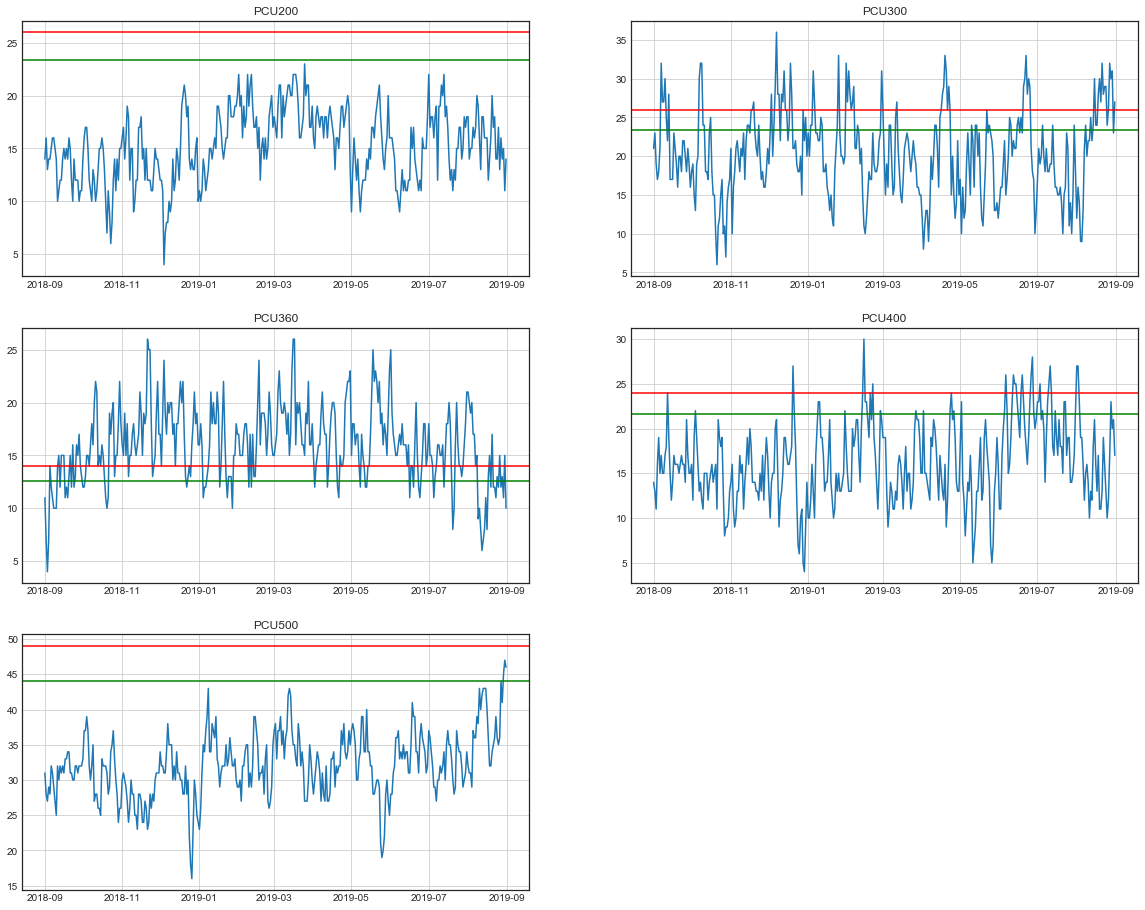

In [560]:
allocation_dict = {
'PCU200': ['Cardiology',
  'Cardiovascular Transplant'],
 'PCU300': ['Green Team',
  'Red Team',
  'Liver Transplant',
  'Transplant',
  'Kidney Transplant', 
  'Urology'],
 'PCU360': ['General Pediatrics', 'Plastic Surgery'],
 'PCU400': ['Pulmonary',
  'Neurosurgery',
  'Neurology',
  'ENT',
  'Orthopedics'],
 'PCU500': ['HemeOnc/SCT', 'General Surgery', 'HemeOnc and StemCell']
}
allocation = allocation_dict_to_dataframe(allocation_dict)
services_to_consider = [item for l in allocation_dict.values() for item in l]
result = cal_daily_census(allocation, service_count_daily, units_to_consider, services_to_consider)

# plot the performance for each unit

f = plt.figure(figsize=(20,16))
off_unit_days = {}
for i in range(len(units_to_consider)):
    unit = units_to_consider[i]
    ax = f.add_subplot(3, 2, i+1)
    ax.plot(result[unit])
    ax.axhline(y=unit_cap_dict[unit], color='r', linestyle='-')
    ax.axhline(y=unit_cap_dict[unit]*0.9, color='g', linestyle='-')
    off_unit_days[unit] = cal_off_cap(result, unit, unit_cap_dict)
    ax.title.set_text(unit)
    ax.grid()
    
print('----off-service-stats----')
print('[over_full_cap_days, over_90%_cap_days]')
over_cap_count = 0
over_90_count = 0
for key in off_unit_days:
    aa, bb = off_unit_days[key]
    over_cap_count += aa
    over_90_count += bb
    print(key, off_unit_days[key])
print('----in-total----')
print(over_cap_count, over_90_count)

## Original comparison

In [ ]:
# calculate the original allocation
service_to_unit_orgin = {}
for service in services_to_consider:
    service_to_unit_orgin[service] = df_to_work.loc[df_to_work['Service.x'] == 
                                                    service]['Dept Abbrev'].value_counts().index[0]

allocation_orig = pd.DataFrame()
allocation_orig['Service'] = services_to_consider
for unit in units_to_consider:
    allocation_orig[unit] = 0
allocation_orig = allocation_orig.set_index('Service')

for service in services_to_consider:
    allocation_orig.loc[service, service_to_unit_orgin[service]] = 1

In [178]:
allocation_orig

,PCU200,PCU300,PCU360,PCU400,PCU500
Service,,,,,
HemeOnc/SCT,0,0,0,0,1
Cardiology,1,0,0,0,0
General Pediatrics,0,0,0,1,0
HemeOnc and StemCell,0,0,0,0,1
Pulmonary,0,0,0,1,0
Green Team,0,1,0,0,0
General Surgery,0,1,0,0,0
Red Team,0,1,0,0,0
Neurosurgery,0,0,0,1,0


PCU200 :::
[0, 0]
[7, 35]
PCU300 :::
[247, 302]
[5, 28]
PCU360 :::
[0, 0]
[6, 26]
PCU400 :::
[321, 352]
[7, 44]
PCU500 :::
[0, 0]
[9, 61]


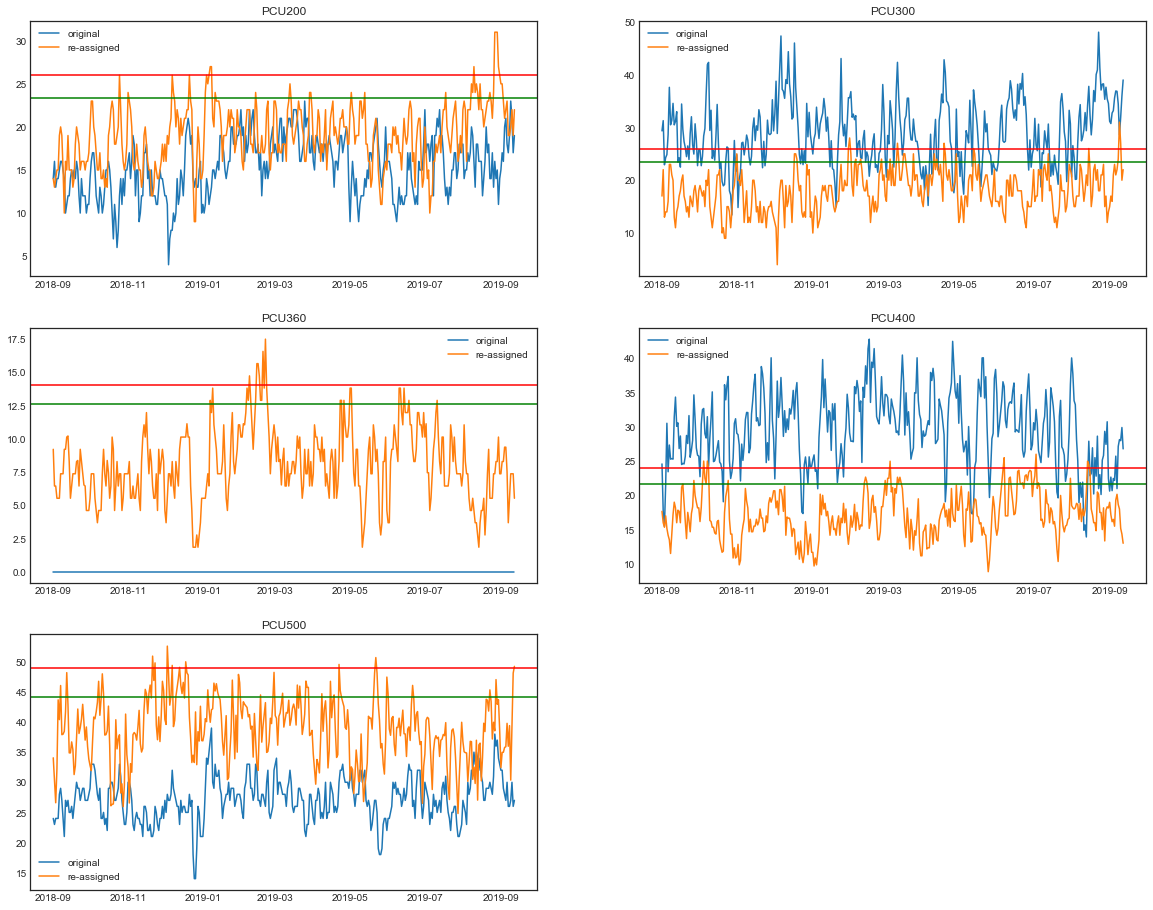

In [162]:
# compare the original solution with the unconstrained allocation 

# f = plt.figure(figsize=(10,3))
# ax = f.add_subplot(121)
# ax2 = f.add_subplot(122)
# x = np.linspace(0,4,1000)
# ax.plot(x, np.sin(x))
# ax2.plot(x, np.cos(x), 'r:')

f = plt.figure(figsize=(20,16))
for i in range(len(units_to_consider)):
    unit = units_to_consider[i]
    ax = f.add_subplot(3, 2, i+1)
    ax.plot(results[0][unit], label = 'original')
    ax.plot(results[1][unit], label = 're-assigned')
    ax.axhline(y=unit_cap_dict[unit], color='r', linestyle='-')
    ax.axhline(y=unit_cap_dict[unit]*0.9, color='g', linestyle='-')
    print(unit, ':::')
    print(cal_off_cap(results[0], unit, unit_cap_dict))
    print(cal_off_cap(results[1], unit, unit_cap_dict))
    ax.legend()
    ax.title.set_text(unit)
    
# f = plt.figure(figsize=(10,3))
# # fig.subplots_adjust(hspace=1, wspace=2)
# for i in range(len(units_to_consider)):
#     unit = units_to_consider[i]
#     plt.subplot(3, 2, i+1)
#     plt.plot(results[0][unit])
# #     ax.text(0.5, 0.5, str((2, 3, i)),
# #            fontsize=18, ha='center')

In [312]:
services_to_consider

['Hematology/Oncology',
 'General Pediatrics',
 'Stem Cell Transplant',
 'Pulmonary',
 'Gastroenterology',
 'General Surgery',
 'Nephrology',
 'Neurosurgery',
 'Orthopedic Surgery',
 'Neurology',
 'Liver Transplant',
 'Otolaryngology (ENT)',
 'Intensive Care',
 'Urology',
 'Rheumatology',
 'Transplant Surgery',
 'Plastic Surgery',
 'Orthopedics',
 'Oncology',
 'Neonatology',
 'Pain Management',
 'Interventional Radiology',
 'GI/Liver']

In [313]:
allocation_orig

,HOPCU,SCTPCU,PCU300,PCU360,PCU400
Service,,,,,
Hematology/Oncology,1,0,0,0,0
General Pediatrics,0,0,0,0,1
Stem Cell Transplant,0,1,0,0,0
Pulmonary,0,0,0,0,1
Gastroenterology,0,0,1,0,0
General Surgery,0,0,1,0,0
Nephrology,0,0,1,0,0
Neurosurgery,0,0,0,0,1
Orthopedic Surgery,0,0,0,0,1


In [280]:
a[('Hematology/Oncology', 'HOPCU')]

<gurobi.Var C690 (value 0.0)>

In [229]:
sol = pd.DataFrame()